<p style="text-align: center; font-size: 28px">Can We Predict and Identify Potential Employee Attrition Before it Occurs?</p>

<p style="text-align: center;">George Cancro</p>

___

### Motivation

Employee attrition is the process of an employee leaving an organization. Attrition can happen for a variety of reasons, such as retirement, job loss, or resignation. When an employee leaves, it can have a negative impact on the organization, as it can lead to a loss in productivity, knowledge, and skills. Attrition can also lead to increased costs, as the organization may need to hire and train new employees to replace the ones who have left.


Employee attrition is a huge problem for businesses. It's expensive to hire and train new employees, and losing good employees can hurt morale and productivity. A good prediction model can help a business reduce employee attrition by identifying employees who are at risk of leaving and taking steps to keep them happy and engaged. For example, if an organization knows that a certain percentage of employees are likely to leave in the next year, it can take steps to improve working conditions or offer incentives to stay. Additionally, predicting employee attrition can help organizations plan for turnover and ensure that they have the necessary staffing levels. If any specific circumstances directly correlate with that employee leaving, it would be cruical for the employers to know them.

___

### Getting Started with Data

The following dataset is the IBM HR Analytics Employee Attrition & Performance data, which has been posted to Kaggle.

https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset?resource=download

This data stands out for the wide variety of features included, as well as the high usability, so I can get started without having to do any scraping and preprocessing.

All packages needed to this exploration are located in requirements.txt file. We can install them to our environment first.

This notebook is written in Python3.9.12, with pip 21.2.4

In [1]:
# uncomment this to install packages
# !pip install -r requirements.txt

In [187]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scipy import stats
import statsmodels.formula.api as smf
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from IPython.display import Image. display


sns.set_style("darkgrid")
plt.tight_layout()


<Figure size 640x480 with 0 Axes>

##### What are our columns? What data type should they be?
This is the col description given by IBM: 
AGE	Numerical Value

ATTRITION	Employee leaving the company no, yes

BUSINESS TRAVEL	No Travel, Travel Frequently, Tavel Rarely

DAILY RATE	Numerical Value - Salary Level

DEPARTMENT	HR, R&D, Sales

DISTANCE FROM HOME	Numerical Value - THE DISTANCE FROM WORK TO HOME

EDUCATION	Numerical Value

EDUCATION FIELD	HR, LIFE SCIENCES, MARKETING, MEDICAL SCIENCES, OTHERS, TEHCNICAL

EMPLOYEE COUNT	Numerical Value

EMPLOYEE NUMBER	Numerical Value - EMPLOYEE ID

ENVIROMENT SATISFACTION	Numerical Value - SATISFACTION WITH THE ENVIROMENT

GENDER	FEMALE, MALE

HOURLY RATE	Numerical Value - HOURLY SALARY

JOB INVOLVEMENT	Numerical Value - JOB INVOLVEMENT

JOB LEVEL	Numerical Value - LEVEL OF JOB

JOB ROLE	HC REP, HR, LAB TECHNICIAN, MANAGER, MANAGING DIRECTOR, REASEARCH DIRECTOR, RESEARCH SCIENTIST, SALES EXECUTIEVE, SALES REPRESENTATIVE

JOB SATISFACTION	Numerical Value - SATISFACTION WITH THE JOB

MARITAL STATUS	DIVORCED, 2=MARRIED, 3=SINGLE

MONTHLY INCOME	Numerical Value - MONTHLY SALARY

MONTHY RATE	Numerical Value - MONTHY RATE

NUMCOMPANIES WORKED	Numerical Value - NO. OF COMPANIES WORKED AT

OVER 18	YES, NO

OVERTIME	NO, YES

PERCENT SALARY HIKE	Numerical Value - PERCENTAGE INCREASE IN SALARY

PERFORMANCE RATING	Numerical Value - ERFORMANCE RATING

RELATIONS SATISFACTION	Numerical Value - RELATIONS SATISFACTION

STANDARD HOURS	Numerical Value - STANDARD HOURS

STOCK OPTIONS LEVEL	Numerical Value - STOCK OPTIONS

TOTAL WORKING YEARS	Numerical Value - TOTAL YEARS WORKED

TRAINING TIMES LAST YEAR	Numerical Value - HOURS SPENT TRAINING

WORK LIFE BALANCE	Numerical Value - TIME SPENT BEWTWEEN WORK AND OUTSIDE

YEARS AT COMPANY	Numerical Value - TOTAL NUMBER OF YEARS AT THE COMPNAY

YEARS IN CURRENT ROLE	Numerical Value -YEARS IN CURRENT ROLE

YEARS SINCE LAST PROMOTION	Numerical Value - LAST PROMOTION

YEARS WITH CURRENT MANAGER	Numerical Value - YEARS SPENT WITH CURRENT MANAGER

Let's look at the current types that pandas read in and determine what typing for all the columns

In [3]:
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
types = dict(df.dtypes.items())
print(types)
df.head()


{'Age': dtype('int64'), 'Attrition': dtype('O'), 'BusinessTravel': dtype('O'), 'DailyRate': dtype('int64'), 'Department': dtype('O'), 'DistanceFromHome': dtype('int64'), 'Education': dtype('int64'), 'EducationField': dtype('O'), 'EmployeeCount': dtype('int64'), 'EmployeeNumber': dtype('int64'), 'EnvironmentSatisfaction': dtype('int64'), 'Gender': dtype('O'), 'HourlyRate': dtype('int64'), 'JobInvolvement': dtype('int64'), 'JobLevel': dtype('int64'), 'JobRole': dtype('O'), 'JobSatisfaction': dtype('int64'), 'MaritalStatus': dtype('O'), 'MonthlyIncome': dtype('int64'), 'MonthlyRate': dtype('int64'), 'NumCompaniesWorked': dtype('int64'), 'Over18': dtype('O'), 'OverTime': dtype('O'), 'PercentSalaryHike': dtype('int64'), 'PerformanceRating': dtype('int64'), 'RelationshipSatisfaction': dtype('int64'), 'StandardHours': dtype('int64'), 'StockOptionLevel': dtype('int64'), 'TotalWorkingYears': dtype('int64'), 'TrainingTimesLastYear': dtype('int64'), 'WorkLifeBalance': dtype('int64'), 'YearsAtComp

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


### Let's set all types to integers, while maintaing which cols are categorical vs continuous

Create two lists of categorical and continuous data, then encode these categorical columns to int cols

The encoding converts these categorical columns into int cols, which allows much easier analysis on the data

In [4]:
print("object typing", type(list(types.values())[1])) # determine what the int type used here is
continuous = [k for k,v in types.items() if v == np.int64]
categorical = [k for k,v in types.items() if v == np.object_]

object typing <class 'numpy.dtype[object_]'>


In [18]:
# df2 will be created so we can encode the categorical columns
df2 = df.convert_dtypes()

print("encoding the following columns to ints starting at 0:")
encoding = {}
for col in categorical:
    out = df2[str(col)].factorize()
    encoding[str(col)] = out[1]
    df2[col] = out[0]

print(encoding)
df2.head()

encoding the following columns to ints starting at 0:
{'Attrition': Index(['Yes', 'No'], dtype='string'), 'BusinessTravel': Index(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype='string'), 'Department': Index(['Sales', 'Research & Development', 'Human Resources'], dtype='string'), 'EducationField': Index(['Life Sciences', 'Other', 'Medical', 'Marketing', 'Technical Degree',
       'Human Resources'],
      dtype='string'), 'Gender': Index(['Female', 'Male'], dtype='string'), 'JobRole': Index(['Sales Executive', 'Research Scientist', 'Laboratory Technician',
       'Manufacturing Director', 'Healthcare Representative', 'Manager',
       'Sales Representative', 'Research Director', 'Human Resources'],
      dtype='string'), 'MaritalStatus': Index(['Single', 'Married', 'Divorced'], dtype='string'), 'Over18': Index(['Y'], dtype='string'), 'OverTime': Index(['Yes', 'No'], dtype='string')}


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,0,0,1102,0,1,2,0,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,1,1,279,1,8,1,0,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,0,0,1373,1,2,2,1,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,1,1,1392,1,3,4,0,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,1,0,591,1,2,1,2,1,7,...,4,80,1,6,3,3,2,2,2,2


### We must create test and train datasets to determine accuracy of models

We will try a 85-15 split here, going to visualize the distributions of the indivudal columns and correlation of the columns

Also, ensure that the distributions of the train and test set match for all features. We will do this using groupby on the output column to ensure balanced sample of labels.

In [6]:
train1 = df2.groupby('Attrition').sample(frac=0.85, random_state=2)
idxs = train1.index
test1 = df2.drop(idxs)
print(train1.shape, test1.shape)

(1249, 35) (221, 35)


#### Using Kolmogorov-Smirnov 2 sample test to determine equal distribution of cols in train and test

This hypothesis test determines if both samples come from the same distribution. 

Assuming an alpha value of .05 to reject the null hypothesis that they come from the same distribution. Any p-value greater than .05 leads us to fail to reject this null hypothesis.

In [7]:
def ks2(train, test):
    results = {}
    for col in train.columns:
        out = stats.ks_2samp(train[col], test[col])
        # we can focus on the p-value for now, ignore the test statistic output
        results[col] = out[1]

    results = sorted(results.items(), key=lambda x:x[1], reverse=False)
    # print("lowest 5 p-values: ", results[:5])
    return results

ks2(train1, test1)[:5]

[('DailyRate', 0.02687692580192169),
 ('MonthlyRate', 0.06415648859120282),
 ('HourlyRate', 0.17646405994079206),
 ('JobRole', 0.1910313794170747),
 ('YearsAtCompany', 0.23578328162811935)]

While most of our features are well above the alpha value, there appears to be one column is falling below the alpha and another that is close to this alpha...

One of our feature columns had a p-value of .2687. After changing around the sample randomness, this became apparent that this sample distributions did not match for the Daily rate col.

Text(0.5, 1.0, 'Distributions of Train and Test data DailyRate')

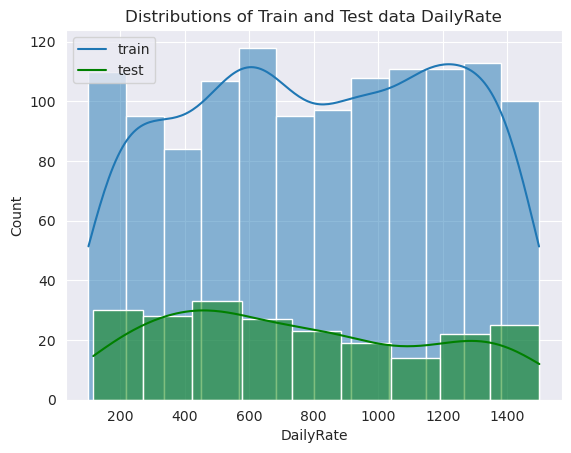

In [10]:
sns.histplot(x=train1["DailyRate"], kde=True)
sns.histplot(x=test1["DailyRate"], kde=True, color="green", legend=True)
plt.legend(labels=["train", "test"])
plt.title("Distributions of Train and Test data DailyRate")

### Let's try a different random state, and compare the ks 2 sample results and ensure that our Percent Hourly Hike col has a more similar distribution in the data

[('MonthlyIncome', 0.2768994631625121), ('EducationField', 0.4685439002792201), ('Education', 0.512001071371831), ('JobSatisfaction', 0.5722842123097247), ('YearsInCurrentRole', 0.5805732022250236), ('RelationshipSatisfaction', 0.645210552725082), ('DailyRate', 0.7250544853491774)]


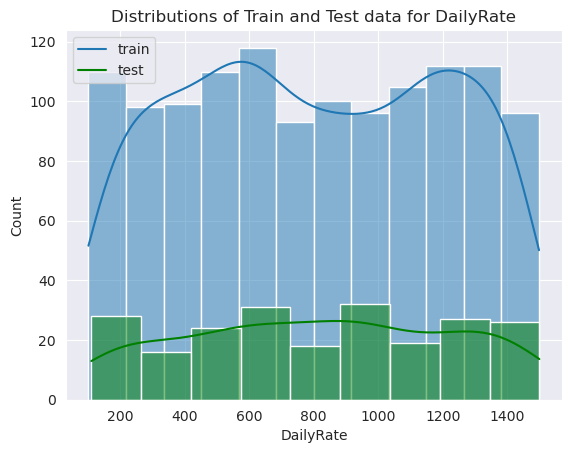

In [15]:
train = df2.groupby('Attrition').sample(frac=0.85, random_state=8)
idxs = train.index
test = df2.drop(idxs)



sns.histplot(x=train["DailyRate"], kde=True)
sns.histplot(x=test["DailyRate"], kde=True, color="green", legend=True)
plt.legend(labels=["train", "test"])
plt.title("Distributions of Train and Test data for DailyRate")
print(ks2(train, test)[:7])

Our test and train data is now statistically similar distributions for all features. We can see that this sample is signifcantly better at matching distributions. Here the pvalue for DailyRate is significantly improved. 

All our other features alpha values are not statisically significant or below the alpha value.

### Data Exploration

Let's visualize our feature data, to get a better understanding of our columns


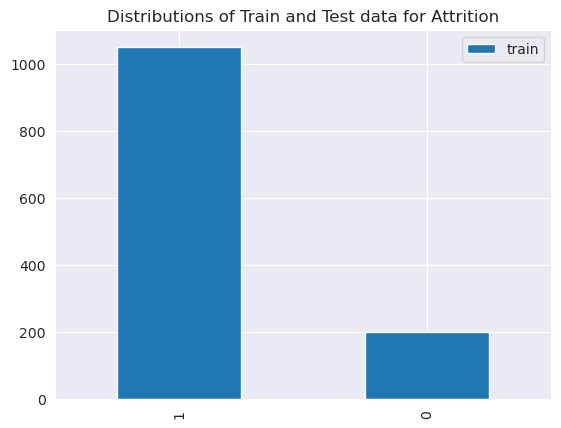

Text(0.5, 1.0, 'Distributions of Train and Test data for Attrition')

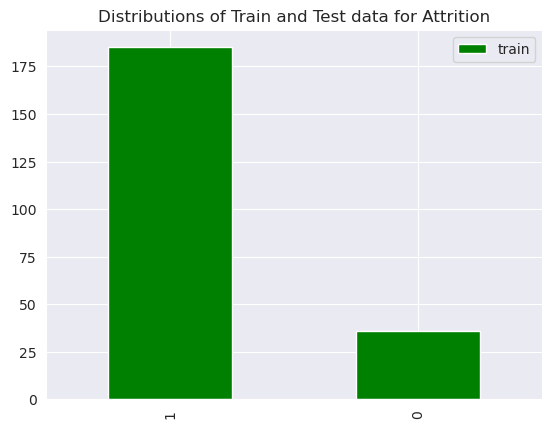

In [44]:

train["Attrition"].value_counts().plot(kind="bar", subplots=False)
# sns.barplot(x=test["Attrition"])
plt.legend(labels=["train", "test"])
plt.title("Distributions of Train and Test data for Attrition")

plt.show()

test["Attrition"].value_counts().plot(kind="bar", color="green")
plt.legend(labels=["train", "test"])
plt.title("Distributions of Train and Test data for Attrition")

We can observe that the distributions for train and test contain very similar distribution of attrition values

### Plotting correlation

Calculate and plot the correlation heatmap for spearman and pearson correlation. Since they are very similar heatmap results, only showing one plot

Text(0.5, 1.0, 'Spearman correlation')

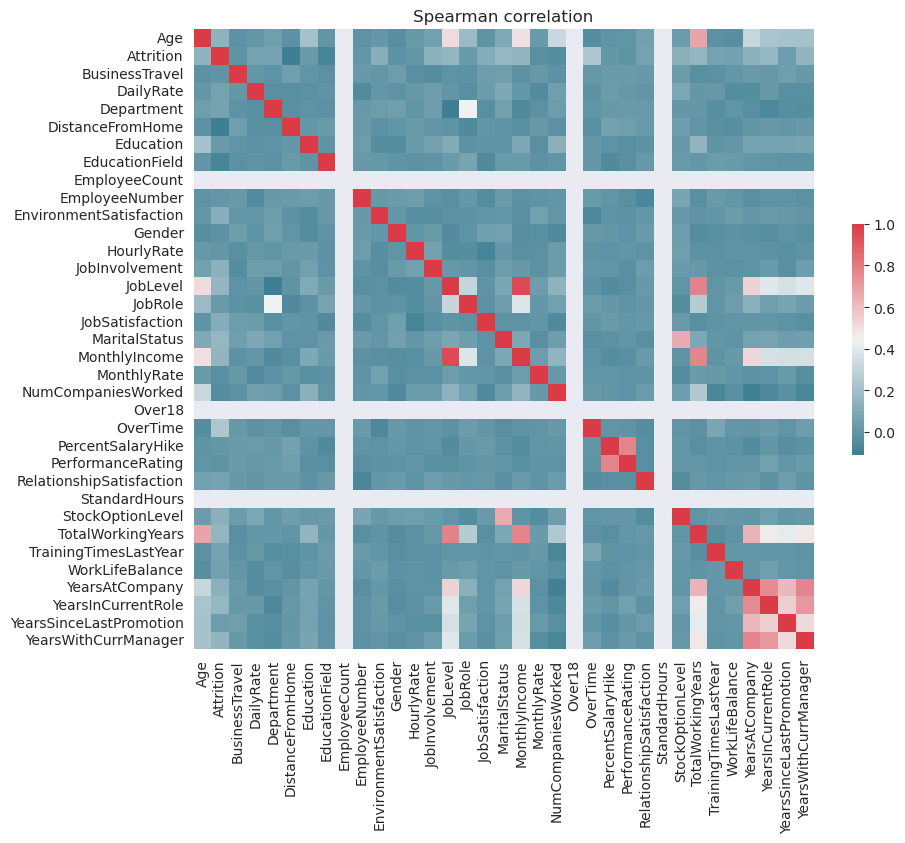

In [55]:
pearson_corr = train.corr()
spearman_corr = train.corr(method="spearman")

# fig, ax = plt.subplots(figsize=(10, 10))                   # Sample figsize in inches

cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )  # color map
# sns.heatmap(data      = pearson_corr, 
#             cmap      = cmap, 
#             square    = True, 
#             cbar_kws  = {'shrink': .3}, 
#             annot     = False, 
#             annot_kws = {'fontsize': 11},
#             ax        = ax
#            )
# plt.title("Pearson correlation")
# plt.show()

fig, ax = plt.subplots(figsize=(10, 10)) 
# heatmap = sns.heatmap(spearman_corr, vmin=-1, vmax=1, annot=True)
sns.heatmap(data      = pearson_corr, 
            cmap      = cmap, 
            square    = True, 
            cbar_kws  = {'shrink': .3}, 
            annot     = False, 
            annot_kws = {'fontsize': 11},
            ax        = ax
           )
plt.title("Spearman correlation")

### Feature engineering and removal

We will drop these columns since they have no variance: employeeCount, over18, standard hours

After looking at the correlation heatmaps, we can view the correlation between many cols that are a factor of time spent at the company. We will engineer a column that will reflect the values of these columns. 

First approach is to use regression to construct a feature from all these correlated columns: 

We will define .7 to be strong correlation, now determine which cols have this strong correlation.

In [200]:
df3 = df2.drop(columns=["EmployeeCount", "EmployeeNumber", "DailyRate", "HourlyRate", "MonthlyRate", "Over18", "StandardHours"])

In [95]:
strong_corr = .7

corr_values = set()
corr_cols = set()
for col in spearman_corr:
    for k,v in spearman_corr[col].items():
        if strong_corr < v < 1:
            corr_values.add((col, k, v))
            corr_cols.add(col)
            corr_cols.add(k)
print(corr_values)
print("\nCorrelated cols:")
corr_cols

{('TotalWorkingYears', 'JobLevel', 0.7349350462830114), ('YearsWithCurrManager', 'YearsInCurrentRole', 0.7242965310605248), ('YearsWithCurrManager', 'YearsAtCompany', 0.8494098862548376), ('YearsAtCompany', 'YearsWithCurrManager', 0.8494098862548376), ('JobLevel', 'MonthlyIncome', 0.9198350070293919), ('YearsInCurrentRole', 'YearsWithCurrManager', 0.7242965310605248), ('StockOptionLevel', 'MaritalStatus', 0.7449123037997186), ('TotalWorkingYears', 'MonthlyIncome', 0.7099380224041191), ('YearsAtCompany', 'YearsInCurrentRole', 0.8473288571795352), ('MonthlyIncome', 'JobLevel', 0.9198350070293919), ('MonthlyIncome', 'TotalWorkingYears', 0.7099380224041191), ('YearsInCurrentRole', 'YearsAtCompany', 0.8473288571795352), ('MaritalStatus', 'StockOptionLevel', 0.7449123037997186), ('JobLevel', 'TotalWorkingYears', 0.7349350462830114)}

Correlated cols:


{'JobLevel',
 'MaritalStatus',
 'MonthlyIncome',
 'StockOptionLevel',
 'TotalWorkingYears',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsWithCurrManager'}

In [202]:
corr_cols2 = {
    # 'JobLevel',
#  'MaritalStatus',
#  'MonthlyIncome',
#  'StockOptionLevel',
#  'TotalWorkingYears',
# "YearsSinceLastPromotion",
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsWithCurrManager'
 }


In [207]:

# x = df3.loc[: , list(corr_cols2)].values
# std_x = StandardScaler().fit_transform(x)

# pca = PCA(n_components=1)

# df3["yearPCA"] =  pca.fit_transform(std_x)


# # df3 = df3.drop(columns=[list(corr_cols2)])

# pca.explained_variance_ratio_




KeyError: "[('YearsAtCompany', 'YearsWithCurrManager', 'YearsInCurrentRole')] not found in axis"

Here are some example graphs that are interesting, since there are 70 can't show all of them


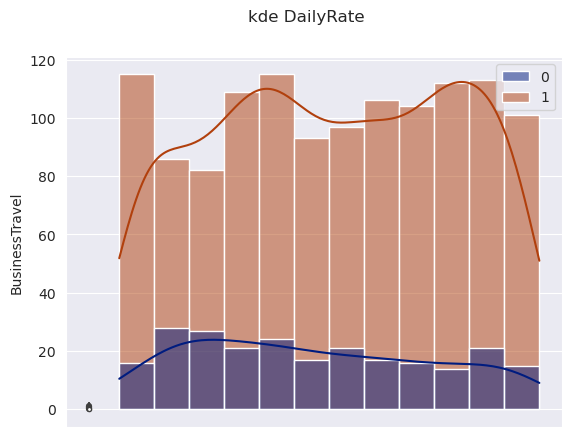

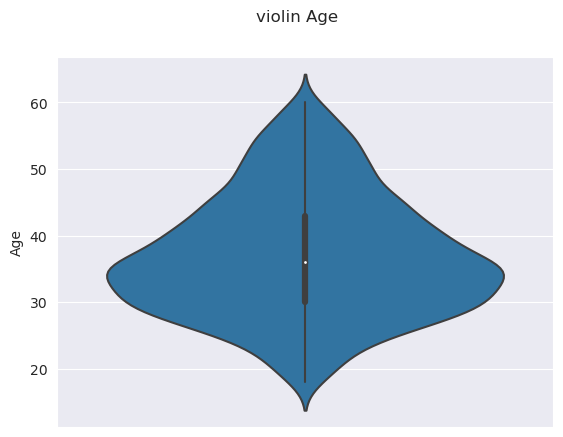

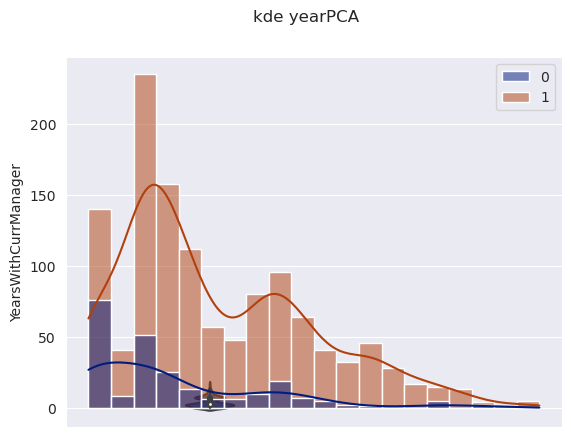

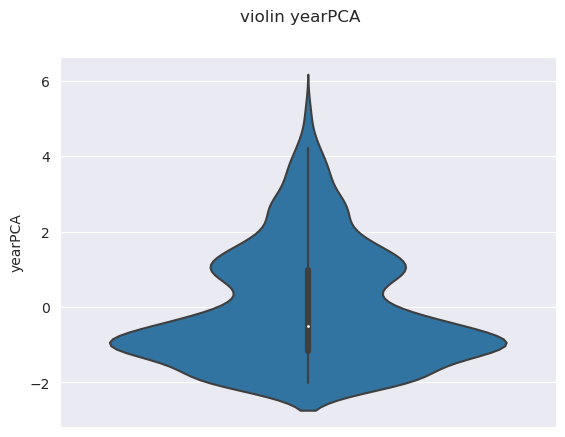

In [208]:
for col in df3.columns:
    sns.histplot(x=df3[col].values, kde=True, palette="dark", hue=df3["Attrition"].values)
    plt.suptitle(f"kde {col}")
    
    plt.savefig(f"kde_images/kde_{col}.png", bbox_inches="tight")
    plt.clf()
    plt.cla()
    sns.violinplot(y=df3[col].astype("float"))
    plt.suptitle(f"violin {col}")
    plt.savefig(f"violinplots/violin_{col}.png", bbox_inches="tight")
# df2.dtypes


print("Here are some example graphs that are interesting, since there are 70 can't show all of them")
display(Image("kde_images/kde_DailyRate.png"))
display(Image("violinplots/violin_Age.png"))
display(Image("kde_images/kde_yearPCA.png"))
# Image("violinplots/violin_yearPCA.png")